In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [232]:
df = pd.read_csv('./datasets/Train_v2.csv')
df.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
bank_account,Yes,No,Yes,No,No
location_type,Rural,Rural,Urban,Rural,Urban
cellphone_access,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
age_of_respondent,24,70,26,34,26
gender_of_respondent,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child


In [233]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [234]:
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [235]:
df.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
bank_account,Yes,No,Yes,No,No
location_type,Rural,Rural,Urban,Rural,Urban
cellphone_access,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
age_of_respondent,24,70,26,34,26
gender_of_respondent,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child


In [236]:
df = shuffle(df)
df.head().T

,6873,12570,19441,8773,19273
country,Rwanda,Rwanda,Tanzania,Rwanda,Tanzania
year,2016,2016,2017,2016,2017
uniqueid,uniqueid_806,uniqueid_6503,uniqueid_4639,uniqueid_2706,uniqueid_4471
bank_account,No,No,No,No,No
location_type,Rural,Urban,Urban,Rural,Urban
cellphone_access,Yes,Yes,No,No,No
household_size,3,9,2,3,2
age_of_respondent,47,35,45,65,17
gender_of_respondent,Female,Female,Male,Female,Female
relationship_with_head,Head of Household,Spouse,Head of Household,Head of Household,Parent


In [237]:
new_df = df.copy()

## EDA

Searching for the relationship between our features and the target

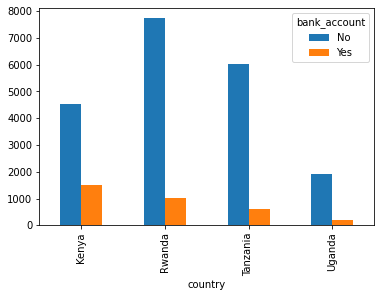

In [238]:
pd.crosstab(new_df.country, new_df.bank_account).plot.bar()

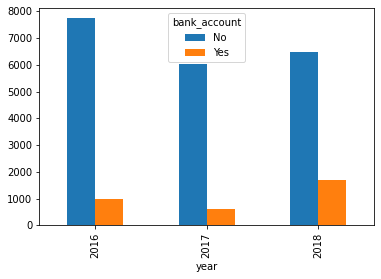

In [239]:
pd.crosstab(new_df.year, new_df.bank_account).plot.bar()

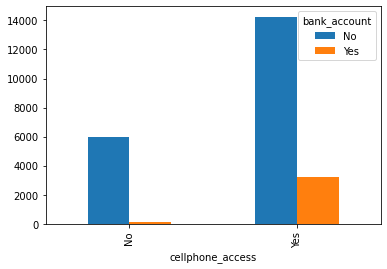

In [240]:
pd.crosstab(new_df.cellphone_access, new_df.bank_account).plot.bar()

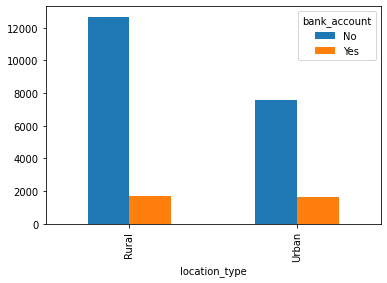

In [241]:
pd.crosstab(new_df.location_type, new_df.bank_account).plot.bar()

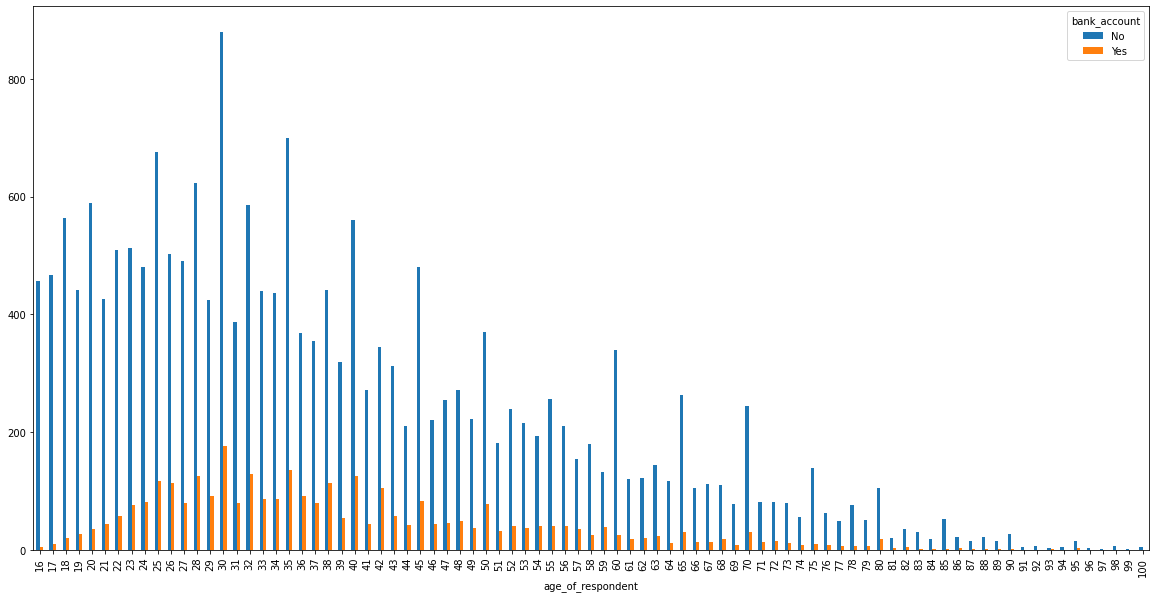

In [242]:
pd.crosstab(new_df.age_of_respondent, new_df.bank_account).plot(kind='bar', figsize=(20, 10))

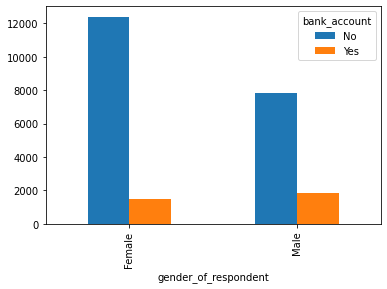

In [243]:
pd.crosstab(new_df.gender_of_respondent, new_df.bank_account).plot.bar()

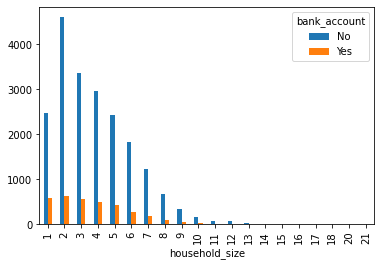

In [244]:
pd.crosstab(new_df.household_size, new_df.bank_account).plot.bar()

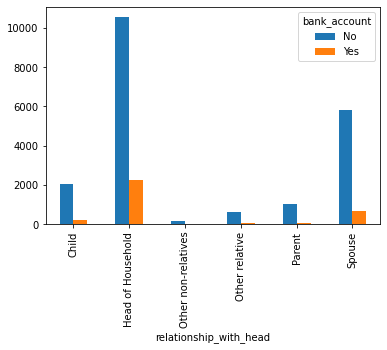

In [245]:
pd.crosstab(new_df.relationship_with_head, new_df.bank_account).plot.bar()

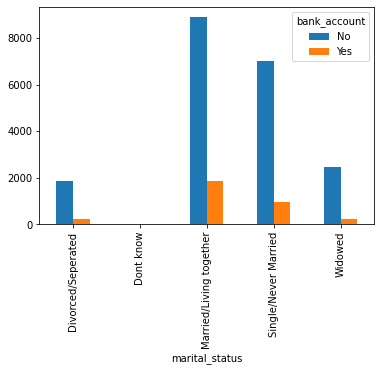

In [246]:
pd.crosstab(new_df.marital_status, new_df.bank_account).plot.bar()

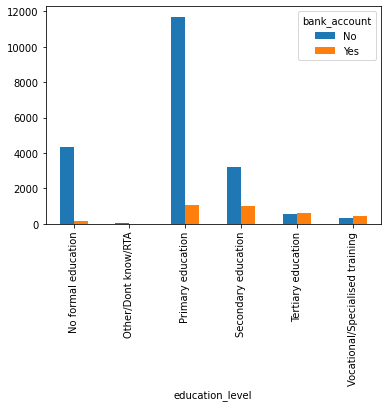

In [247]:
pd.crosstab(new_df.education_level, new_df.bank_account).plot.bar()

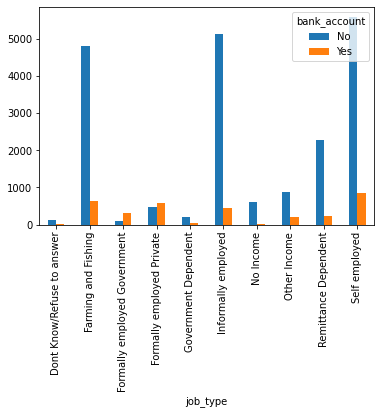

In [248]:
pd.crosstab(new_df.job_type, new_df.bank_account).plot.bar()

## Findings

The following are conclusions from our EDA
  * The country one belongs influences your chances of having a bank account
   - For instance, you have a higher chance of having a bank account if Kenyan than if Tanzanian.
     This is despite Tanzania having higher respondents
  * Respondents with cellphone access have a higher chance of having a bank account that those without cellphone       access
  * Younger respondents then to have bank accounts as compared to their older counterparts
  * Repondents coming from a home with fewer people tend to have bank accounts as compared to those from               households with a large number of occupants
  * Respondents that are married or single tend to have bank accounts
  * Respondents with a primary education at the very least tend to have bank accounts
  * Respondents who are employed or have any other source of income apart from government assistance tend to have     a bank account

In [249]:
new_df.head().T

,6873,12570,19441,8773,19273
country,Rwanda,Rwanda,Tanzania,Rwanda,Tanzania
year,2016,2016,2017,2016,2017
uniqueid,uniqueid_806,uniqueid_6503,uniqueid_4639,uniqueid_2706,uniqueid_4471
bank_account,No,No,No,No,No
location_type,Rural,Urban,Urban,Rural,Urban
cellphone_access,Yes,Yes,No,No,No
household_size,3,9,2,3,2
age_of_respondent,47,35,45,65,17
gender_of_respondent,Female,Female,Male,Female,Female
relationship_with_head,Head of Household,Spouse,Head of Household,Head of Household,Parent


In [250]:
new_df_2 = new_df.drop(
    labels=['year', 'location_type', 'gender_of_respondent', 'uniqueid'],
    axis=1
)

In [251]:
new_df_2.head().T

,6873,12570,19441,8773,19273
country,Rwanda,Rwanda,Tanzania,Rwanda,Tanzania
bank_account,No,No,No,No,No
cellphone_access,Yes,Yes,No,No,No
household_size,3,9,2,3,2
age_of_respondent,47,35,45,65,17
relationship_with_head,Head of Household,Spouse,Head of Household,Head of Household,Parent
marital_status,Single/Never Married,Married/Living together,Single/Never Married,Widowed,Divorced/Seperated
education_level,Primary education,Primary education,Primary education,No formal education,Primary education
job_type,Informally employed,Informally employed,Self employed,Farming and Fishing,Remittance Dependent


In [252]:
X = new_df_2.drop('bank_account', axis=1)
y = new_df_2.bank_account

categorical_columns = [
    'country',
    'cellphone_access',
    'relationship_with_head',
    'marital_status',
    'education_level',
    'job_type'
]

one_hot_encoder = OneHotEncoder()

target_column = ['bank_account']

X_transformer = ColumnTransformer(
    transformers=[
        ('categorical_transformer', one_hot_encoder, categorical_columns)
    ]
)
y_transformer = ColumnTransformer(
    ['target_transformer', one_hot_encoder, target_column]
)

X = X_transformer.fit_transform(X)

In [263]:
y = LabelBinarizer().fit_transform(y)

In [267]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X, y)

/home/adam/Desktop/Financial Inclusion in Africa/fiia/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [268]:
test_data = pd.read_csv('./datasets/Test_v2.csv')
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
